In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

import pandas as pd
import numpy as np

In [27]:
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels

# Load dataset of "Retail Building"

In [30]:
retail_filename = "./Original/building1retail.csv"
retail_df =  pd.read_csv(retail_filename, header=0, index_col='Timestamp', parse_dates=True)
retail_df.head(10)

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8
2010-01-01 02:30:00,51,159.0
2010-01-01 02:45:00,51,157.7
2010-01-01 03:00:00,51,163.2
2010-01-01 03:15:00,50,151.7


In [6]:
#Describe data
retail_df.describe()

,OAT (F),Power (kW)
count,34940.000000,34940.000000
mean,58.585690,261.644659
std,8.739352,65.673392
min,33.000000,0.000000
25%,53.000000,194.600000
50%,58.000000,276.700000
75%,64.000000,312.300000
max,100.000000,457.900000


## Visualize (Retail building)

Text(0.5, 1.0, 'Power consumption of retail building')

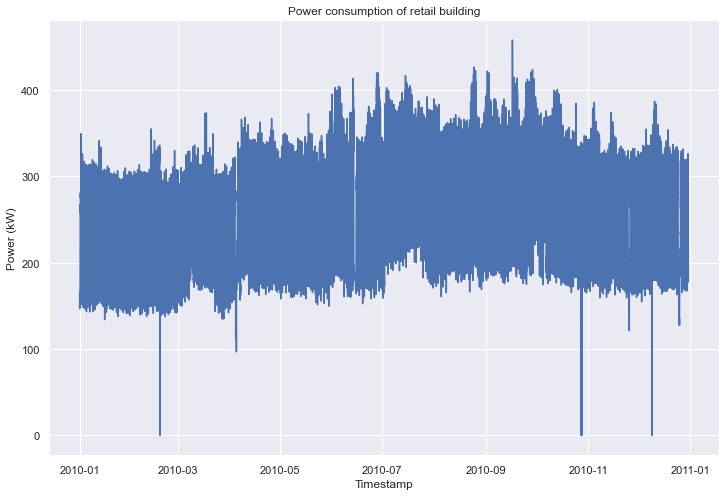

In [7]:
#Normal line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=retail_df, x=retail_df.index, y=retail_df['Power (kW)'])
plt.title('Power consumption of retail building')

In [8]:
#Copy the dataframe
new_retail_df = retail_df.copy()

In [9]:
#Group by day (sum total power consumption by day)
new_retail_df = new_retail_df.groupby(pd.Grouper(freq='D')).sum()
new_retail_df.head(7)

,OAT (F),Power (kW)
Timestamp,,
2010-01-01,4964,22433.4
2010-01-02,5032,23035.8
2010-01-03,4604,22309.1
2010-01-04,4632,22890.9
2010-01-05,4641,22831.4
2010-01-06,4711,22767.4
2010-01-07,4661,22733.8


In [10]:
#Add new column (days of week)
new_retail_df['daysofweek'] = new_retail_df.index.day_name()
new_retail_df.head(5)

,OAT (F),Power (kW),daysofweek
Timestamp,,,
2010-01-01,4964,22433.4,Friday
2010-01-02,5032,23035.8,Saturday
2010-01-03,4604,22309.1,Sunday
2010-01-04,4632,22890.9,Monday
2010-01-05,4641,22831.4,Tuesday


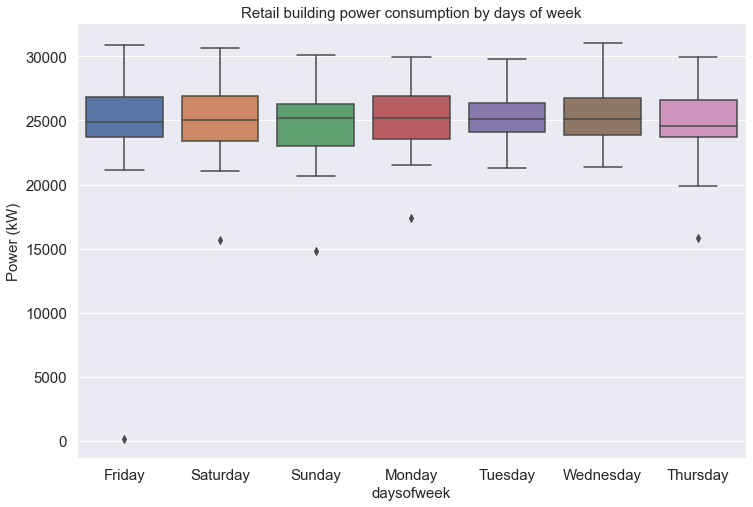

In [34]:
#Plot power consumption by days of week
plt.close()
plt.figure(figsize=(12, 8))
sns.boxplot(data=new_retail_df, x=new_retail_df.daysofweek, y=new_retail_df['Power (kW)'])
plt.title('Retail building power consumption by days of week')
plt.savefig("./Images/Retail_DaysofWeek.png", dpi=400, format='png')

### * The graph shows that retail building usually used almost the same amount of energy each day

# Load dataset of "Office Building"

In [14]:
office_filename = "./Original/building61duringoffice.csv"
office_df =  pd.read_csv(office_filename, header=0, index_col='Date', parse_dates=True)
office_df.head(10)

,OAT,Power
Date,,
2010-01-01 00:00:00,29.420300,24.0
2010-01-01 01:00:00,29.910495,29.7
2010-01-01 02:00:00,30.216893,31.4
2010-01-01 03:00:00,30.217575,35.7
2010-01-01 04:00:00,29.607685,35.9
2010-01-01 05:00:00,28.744257,36.1
2010-01-01 06:00:00,28.552293,31.7
2010-01-01 07:00:00,25.234590,34.1
2010-01-01 08:00:00,25.380340,35.8


## Visualization (Office building)

Text(0.5, 1.0, 'Power consumption of office building')

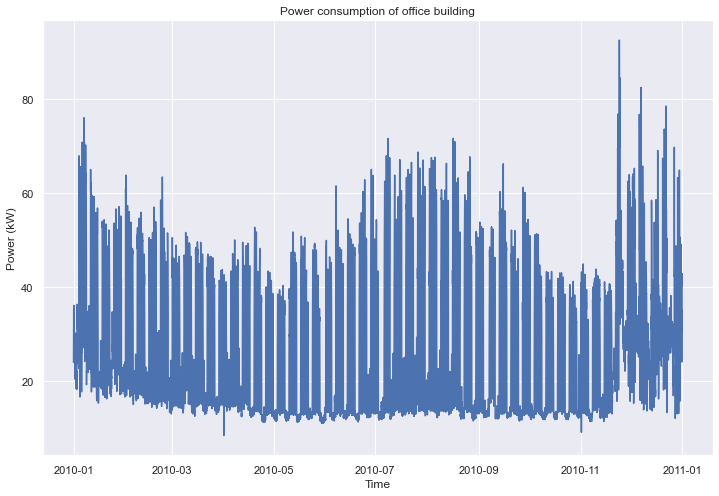

In [18]:
#Normal line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=office_df, x=office_df.index, y=office_df['Power'])
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.title('Power consumption of office building')

### We cannot get much information from this graph, let's perform the same thing as retail building

In [19]:
#Copy the dataframe
new_office_df = office_df.copy()

In [20]:
#Group by day (sum total power consumption by day)
new_office_df = new_office_df.groupby(pd.Grouper(freq='D')).sum()
new_office_df.head(7)

,OAT,Power
Date,,
2010-01-01,828.875458,680.6
2010-01-02,1042.011007,557.9
2010-01-03,814.233140,686.9
2010-01-04,827.387732,1029.8
2010-01-05,883.545252,1000.0
2010-01-06,850.703550,1104.4
2010-01-07,693.277605,1225.3


In [21]:
#Add new column (days of week)
new_office_df['daysofweek'] = new_office_df.index.day_name()
new_office_df.head(5)

,OAT,Power,daysofweek
Date,,,
2010-01-01,828.875458,680.6,Friday
2010-01-02,1042.011007,557.9,Saturday
2010-01-03,814.233140,686.9,Sunday
2010-01-04,827.387732,1029.8,Monday
2010-01-05,883.545252,1000.0,Tuesday


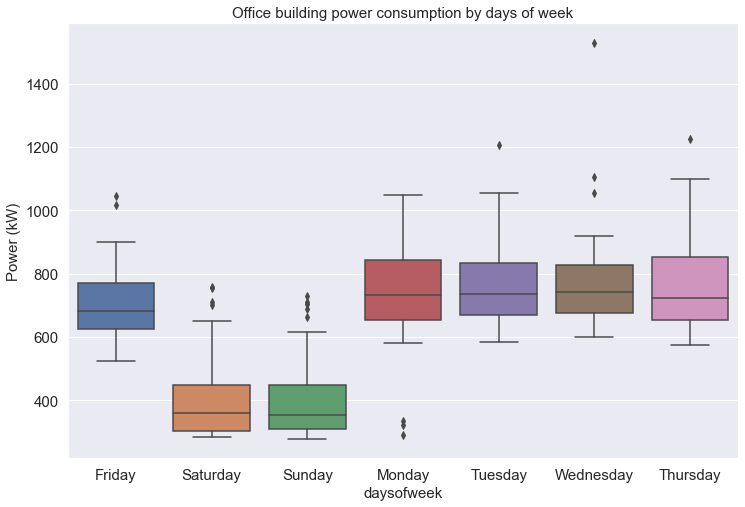

In [29]:
#Plot power consumption by days of week
plt.close()
plt.figure(figsize=(12, 8))
sns.boxplot(data=new_office_df, x=new_office_df.daysofweek, y=new_office_df['Power'])
plt.ylabel('Power (kW)')
plt.title('Office building power consumption by days of week')
plt.savefig("./Images/Office_DaysofWeek.png", dpi=400, format='png')

### - From the box-whisker plot, we noticed that the weekends power consumption was used less energy than weekdays
### - In short, this features such as (Days of week) and (Type of building) can be used as learning features for machine learning to predict the power consumption between "retail" or "office" buildings.